# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

Saya melakukan scraping data pada situs detik.com guna mencari trenpemberitaan terkini yang berkaitan dengan gempa. Data ini menjadi penting guna mencermati tren isu dalam sebuah pemberitaan. Hipotesa saya dalam temaun ini akan memuat isu pemberitaan berdasarkan lokasinya dan isu penting lainnya yang memiliki keterkaitan dengan pemberitaan gemba di detik.com

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [5]:
import requests

url = "https://www.detik.com/search/searchall?query=gempa"


To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [15]:
response = requests.get(url)

printAs we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [16]:
soup = BeautifulSoup(response.text, 'html.parser')

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [43]:
table = soup.find('div', attrs={'class':'list media_rows list-berita'})
print(table.prettify()[1:1000])

div class="list media_rows list-berita">
 <article>
  <a href="https://www.detik.com/sulsel/berita/d-7092095/gempa-bumi-terkini-m-3-1-guncang-jayapura-papua-berpusat-di-darat" onclick='_pt(this, "newsfeed", "Gempa Bumi Terkini M 3,1 Guncang Jayapura Papua, Berpusat di Darat", "artikel 1")'>
   <span class="ratiobox box_thumb">
    <span class="ratiobox_content lqd">
     <img alt="Gempa Bumi Terkini M 3,1 Guncang Jayapura Papua, Berpusat di Darat" class="" src="https://akcdn.detik.net.id/community/media/visual/2023/02/09/ilustrasi-gempa_43.jpeg?w=250&amp;q=" title="Gempa Bumi Terkini M 3,1 Guncang Jayapura Papua, Berpusat di Darat">
     </img>
    </span>
   </span>
   <span class="box_text">
    <span class="date">
     <span class="category">
      detikSulsel
     </span>
     Jumat, 15 Des 2023 18:09 WIB
    </span>
    <h2 class="title">
     Gempa Bumi Terkini M 3,1 Guncang Jayapura Papua, Berpusat di Darat
    </h2>
    <p>
     Gempa bumi berkekuatan magnitudo (M) 3,1 menggun


Finding row length.

In [17]:
judul_artikel = soup.find_all('h2', class_='title')
tanggal_artikel = soup.find_all('span', class_='date')

Do the scrapping process here (please change this markdown with your explanation)

In [20]:
    for judul, tanggal in zip(judul_artikel, tanggal_artikel):
        print("Judul:", judul.text.strip())
        print("Tanggal:", tanggal.text.strip())
        print("-" * 50)

Judul: Waspada Varian Baru COVID-19 dan Peduli Potensi Bencana
Tanggal: detikNewsSabtu, 16 Des 2023 09:27 WIB
--------------------------------------------------
Judul: Gempa M 2,0 Guncang Wonosobo, Berpusat di Darat
Tanggal: detikNewsSabtu, 16 Des 2023 07:21 WIB
--------------------------------------------------
Judul: BMKG Ungkap Sejumlah Rumah di Brebes Rusak Akibat Gempa Tegal M 4,5
Tanggal: detikNewsSabtu, 16 Des 2023 00:31 WIB
--------------------------------------------------
Judul: Gempa M 4,5 Tegal Terasa di Brebes: Terasa bak Bumi Bergetar
Tanggal: detikJatengJumat, 15 Des 2023 23:12 WIB
--------------------------------------------------
Judul: BRIN Teliti Gelombang Infrasonik untuk Misi Keantariksaan
Tanggal: detikInetJumat, 15 Des 2023 22:30 WIB
--------------------------------------------------
Judul: Update: Gempa Darat M 4,5 Guncang Tegal Malam Ini
Tanggal: detikJatengJumat, 15 Des 2023 21:51 WIB
--------------------------------------------------
Judul: Gempa Bumi Terkini

## Creating data frame & Data wrangling

Put the array into dataframe

In [56]:
import pandas as pd


response = requests.get(url)

if response.status_code == 200:

    soup = BeautifulSoup(response.text, 'html.parser')

   
    judul_artikel = soup.find_all('h2', class_='title')
    tanggal_artikel = soup.find_all('span', class_='date')

  
    data_list = []
    for judul, tanggal in zip(judul_artikel, tanggal_artikel):
        data_list.append({
            "Judul": judul.text.strip(),
            "Tanggal": tanggal.text.strip()
        })

    
    df = pd.DataFrame(data_list)

    
    print("Data awal:")
    print(df)

  
    df.to_csv("hasil_scraping.csv", index=False)




Data awal:
                                               Judul   
0  Waspada Varian Baru COVID-19 dan Peduli Potens...  \
1    Gempa M 2,0 Guncang Wonosobo, Berpusat di Darat   
2  BMKG Ungkap Sejumlah Rumah di Brebes Rusak Aki...   
3  Gempa M 4,5 Tegal Terasa di Brebes: Terasa bak...   
4  BRIN Teliti Gelombang Infrasonik untuk Misi Ke...   
5  Update: Gempa Darat M 4,5 Guncang Tegal Malam Ini   
6  Gempa Bumi Terkini M 3,7 Guncang Melonguane Su...   
7  Gempa M 2,2 Goyang Perairan Gunungkidul Malam Ini   
8            Cianjur Tetapkan Status Waspada Bencana   

                                   Tanggal  
0    detikNewsSabtu, 16 Des 2023 09:27 WIB  
1    detikNewsSabtu, 16 Des 2023 07:21 WIB  
2    detikNewsSabtu, 16 Des 2023 00:31 WIB  
3  detikJatengJumat, 15 Des 2023 23:12 WIB  
4    detikInetJumat, 15 Des 2023 22:30 WIB  
5  detikJatengJumat, 15 Des 2023 21:51 WIB  
6  detikSulselJumat, 15 Des 2023 20:54 WIB  
7   detikJogjaJumat, 15 Des 2023 19:57 WIB  
8   detikJabarJumat, 15

Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

In [51]:
df.head()

,Judul
0,Waspada Varian Baru COVID-19 dan Peduli Potens...
1,"Gempa M 2,0 Guncang Wonosobo, Berpusat di Darat"
2,BMKG Ungkap Sejumlah Rumah di Brebes Rusak Aki...
3,"Gempa M 4,5 Tegal Terasa di Brebes: Terasa bak..."
4,BRIN Teliti Gelombang Infrasonik untuk Misi Ke...


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

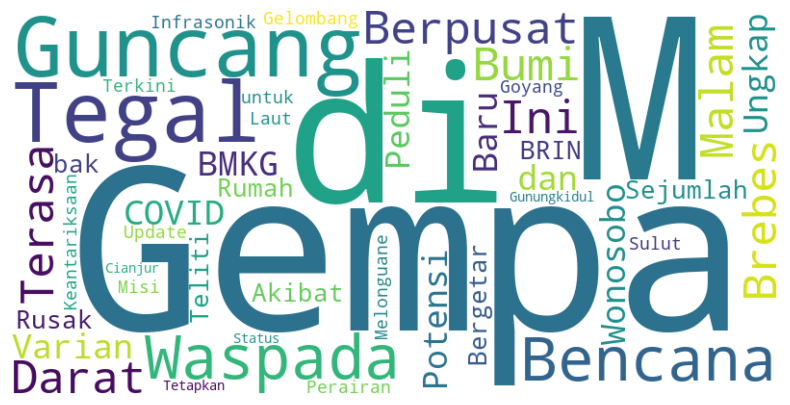

In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


if response.status_code == 200:
   
    soup = BeautifulSoup(response.text, 'html.parser')

 
    judul_artikel = soup.find_all('h2', class_='title')


    data_list = []
    for judul in judul_artikel:
        data_list.append({
            "Judul": judul.text.strip()
        })


    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text)


    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()




mengingat data hyang saya dapatkan mayoritas berupa tekx maka saya mencoba fungsi lain yakni bentuk visualisasinya berbentuk word cloud. Jika di cermati berdasarkan data visualisasi di atas menunjuka seluruh berita berikisan tentang gempa, kemudian berita juga menunjukan lokasi-loaksi terjadinya gempa.

### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.